In [1]:
x  <- c(1042,1617,1180,973,1552)
y  <- c(847,389,612)

### Wilcoxon and MW

In [2]:
wilcox.test(x,y)


	Wilcoxon rank sum test

data:  x and y
W = 15, p-value = 0.03571
alternative hypothesis: true location shift is not equal to 0


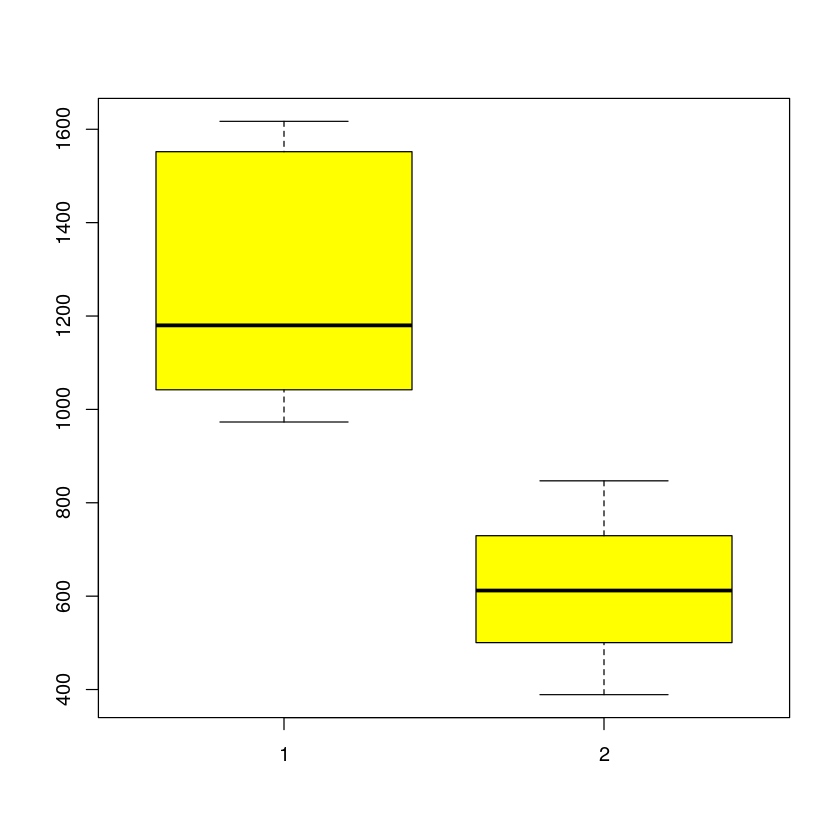

In [3]:
boxplot(x,y,col = "yellow")

In [5]:
wilcox.test(x,y, exact = T)
wilcox.test(x,y, exact = F)


	Wilcoxon rank sum test

data:  x and y
W = 15, p-value = 0.03571
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 15, p-value = 0.03689
alternative hypothesis: true location shift is not equal to 0


In [6]:
?kruskal.test

In [7]:
x <- c(2.9, 3.0, 2.5, 2.6, 3.2) # normal subjects
y <- c(3.8, 2.7, 4.0, 2.4)      # with obstructive airway disease
z <- c(2.8, 3.4, 3.7, 2.2, 2.0) # with asbestosis
kruskal.test(list(x, y, z))


	Kruskal-Wallis rank sum test

data:  list(x, y, z)
Kruskal-Wallis chi-squared = 0.77143, df = 2, p-value = 0.68


In [8]:
f  <- function(a,b){
    print(wilcox.test(a,b)$p.value)
}

In [9]:
f(x,y)
f(x,z)
f(z,y)

[1] 0.7301587
[1] 1
[1] 0.4126984


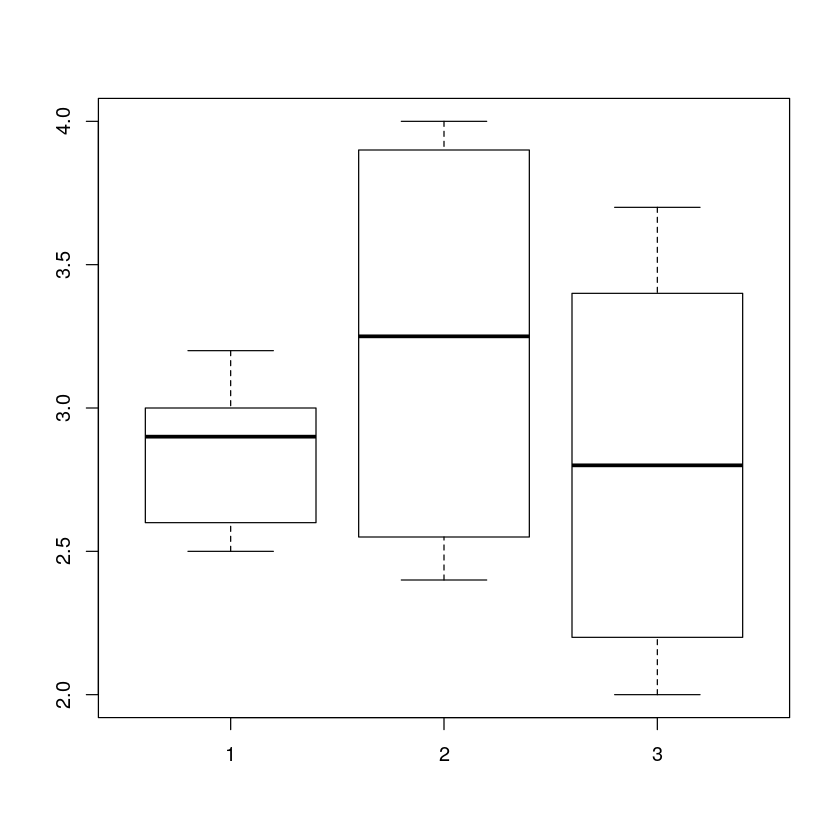

In [10]:
boxplot(x,y,z)

### KW

In [11]:
install.packages('NSM3')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
also installing the dependencies ‘classInt’, ‘labelled’, ‘questionr’, ‘TH.data’, ‘sandwich’, ‘gmp’, ‘sets’, ‘klaR’, ‘AlgDesign’, ‘e1071’, ‘libcoin’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’, ‘survival’, ‘Formula’, ‘acepack’, ‘htmlTable’, ‘combinat’, ‘partitions’, ‘agricolae’, ‘ash’, ‘binom’, ‘BSDA’, ‘coin’, ‘epitools’, ‘Hmisc’, ‘km.ci’, ‘metafor’, ‘nortest’, ‘Rfit’, ‘SemiPar’



In [12]:
library('NSM3')

Loading required package: combinat

Attaching package: ‘combinat’

The following object is masked from ‘package:utils’:

    combn

Loading required package: MASS
Loading required package: partitions
Loading required package: survival
fANCOVA 0.5-1 loaded


In [13]:
pKW(list(x,y,z))
pKW(list(x,y,z), method="Asymptotic")

Group sizes: 5 4 5 
Kruskal-Wallis H Statistic: 0.7714
Monte Carlo (Using 10000 Iterations) upper-tail probability: 0.7087

Group sizes: 5 4 5 
Kruskal-Wallis H Statistic: 0.7714
Asymptotic upper-tail probability: 0.68

### Friedman

In [14]:
?friedman.test

In [15]:
RoundingTimes <-
matrix(c(5.40, 5.50, 5.55,
         5.85, 5.70, 5.75,
         5.20, 5.60, 5.50,
         5.55, 5.50, 5.40,
         5.90, 5.85, 5.70,
         5.45, 5.55, 5.60,
         5.40, 5.40, 5.35,
         5.45, 5.50, 5.35,
         5.25, 5.15, 5.00,
         5.85, 5.80, 5.70,
         5.25, 5.20, 5.10,
         5.65, 5.55, 5.45,
         5.60, 5.35, 5.45,
         5.05, 5.00, 4.95,
         5.50, 5.50, 5.40,
         5.45, 5.55, 5.50,
         5.55, 5.55, 5.35,
         5.45, 5.50, 5.55,
         5.50, 5.45, 5.25,
         5.65, 5.60, 5.40,
         5.70, 5.65, 5.55,
         6.30, 6.30, 6.25),
       nrow = 22,
       byrow = TRUE,
       dimnames = list(1 : 22,
                       c("Round Out", "Narrow Angle", "Wide Angle")))
friedman.test(RoundingTimes)
## => strong evidence against the null that the methods are equivalent
##    with respect to speed


	Friedman rank sum test

data:  RoundingTimes
Friedman chi-squared = 11.143, df = 2, p-value = 0.003805


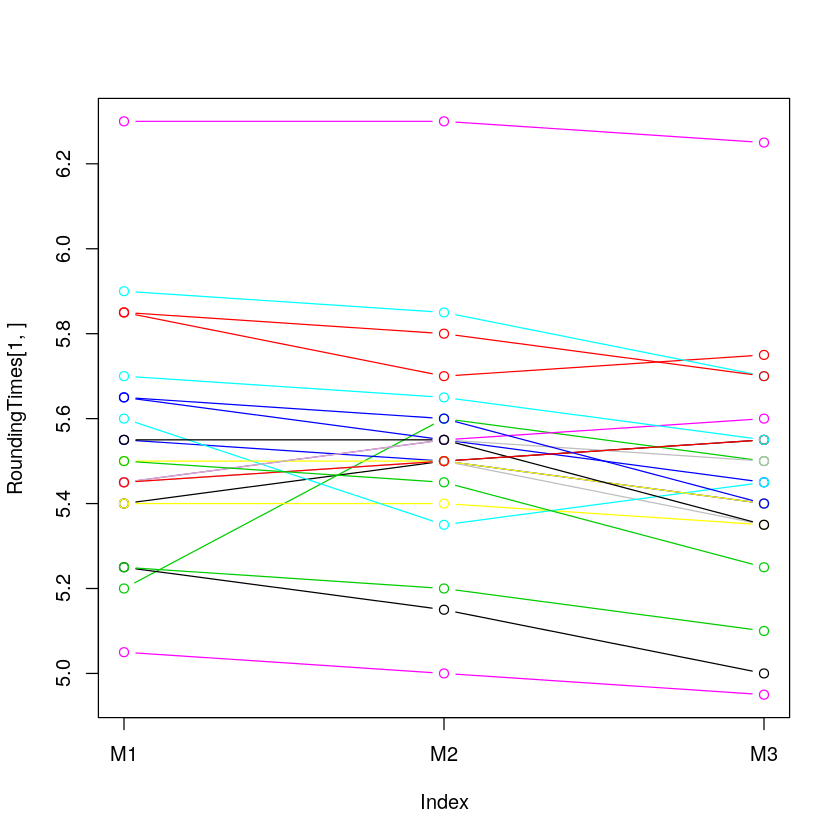

In [20]:
plot(RoundingTimes[1,], type='b', ylim=c(min(RoundingTimes), max(RoundingTimes)), xaxt = 'n')
axis(side=1,at=1:3, labels=c('M1','M2','M3'))
for (j in 2:22){
    lines(1:3, RoundingTimes[j,], type='b', col=j)
}

### Air Quality 

In [21]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


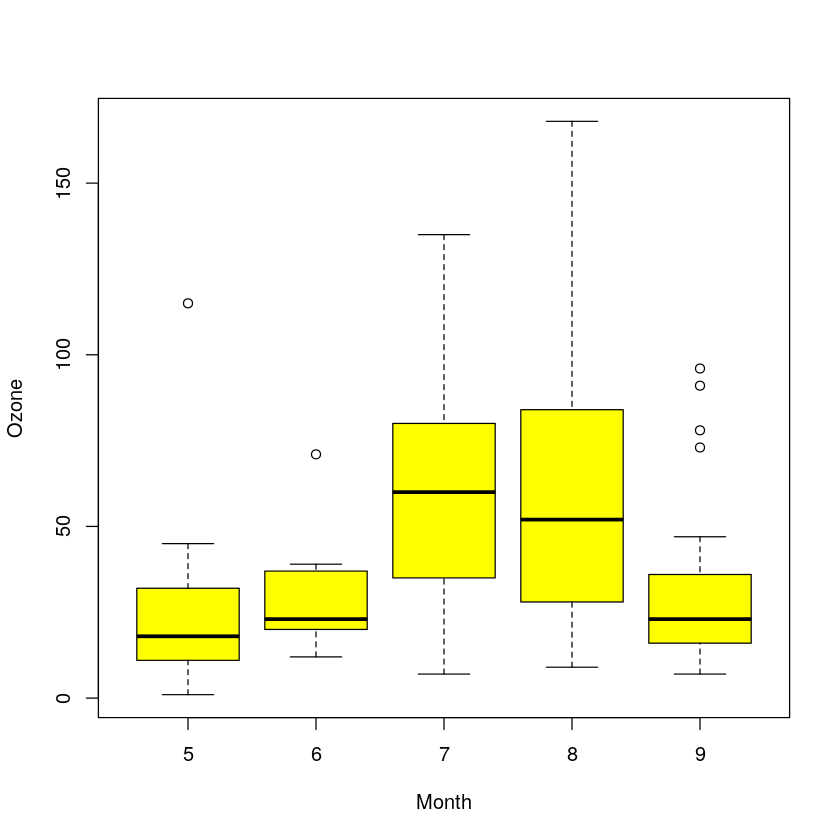

In [22]:
boxplot(Ozone~Month, data=airquality, col='yellow')

#### Is there any difference in Ozone between various months?

In [23]:
kruskal.test(Ozone~Month, data=airquality)


	Kruskal-Wallis rank sum test

data:  Ozone by Month
Kruskal-Wallis chi-squared = 29.267, df = 4, p-value = 6.901e-06


Yes, p-value<0.01

#### Starting from September some attempts to improve the air quality were made. Did they help?


For each day in September, we find a similar day in May-August 


In [24]:
aver=rep(0,5)
for (i in 5:9){
    ind = which(airquality$Month == i)
    aver[i-4]=mean(airquality$Ozone[ind], na.rm = T)
}



In [27]:
aver

[1] 23.61538 29.44444 59.11538 59.96154 31.44828

In [29]:
air = airquality$Ozone
for (j in 1:153){
    if (is.na(airquality$Ozone[j])==T){
        air[j] = aver[airquality$Month[j] - 4 ]
    }
}

In [31]:
M = scale(airquality[,2:4])

In [32]:
airquality$Month

[1] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6
 [38] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7
 [75] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
[112] 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
[149] 9 9 9 9 9

In [33]:
min(which(airquality$Month == 9))

[1] 124

In [34]:
res=rep(0,30)

In [35]:
s =  rep(0,123)

In [37]:
for (i in 124:153){
    x=M[i,]
    for (j in 1:123){
        s[j]=dist(rbind(x, M[j,]))
    }
    res[i-123]=air[which.min(s)]
}
res

[1]  85.00000  85.00000 118.00000  85.00000  78.00000   7.00000  31.00000
 [8]  45.00000  31.00000  29.44444  45.00000  21.00000  29.44444  29.44444
[15]  12.00000  29.44444  28.00000  29.44444  16.00000 108.00000  14.00000
[22]  29.44444  29.00000  29.44444  28.00000  41.00000  12.00000  21.00000
[29]  29.44444  14.00000

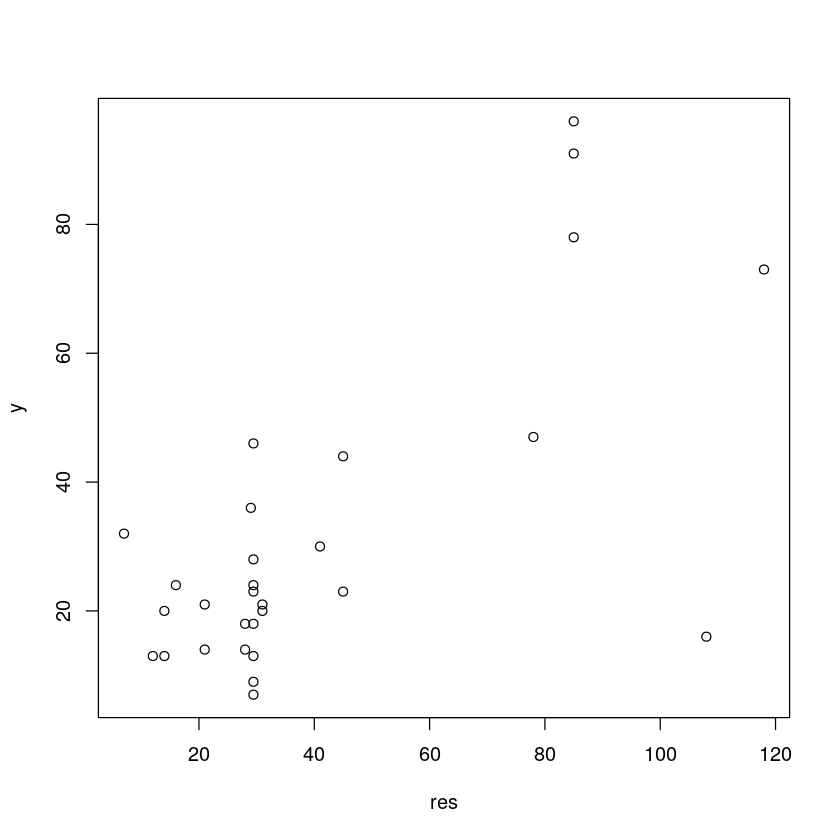

In [38]:
y = airquality$Ozone[124:153]
plot(res, y)

In [40]:
wilcox.test(res, y, paired = T)
wilcox.test(res, y, paired = T, alternative = "greater")

Warning message in wilcox.test.default(res, y, paired = T):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(res, y, paired = T):
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  res and y
V = 307, p-value = 0.01838
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(res, y, paired = T, alternative = "greater"):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(res, y, paired = T, alternative = "greater"):
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  res and y
V = 307, p-value = 0.009189
alternative hypothesis: true location shift is greater than 0


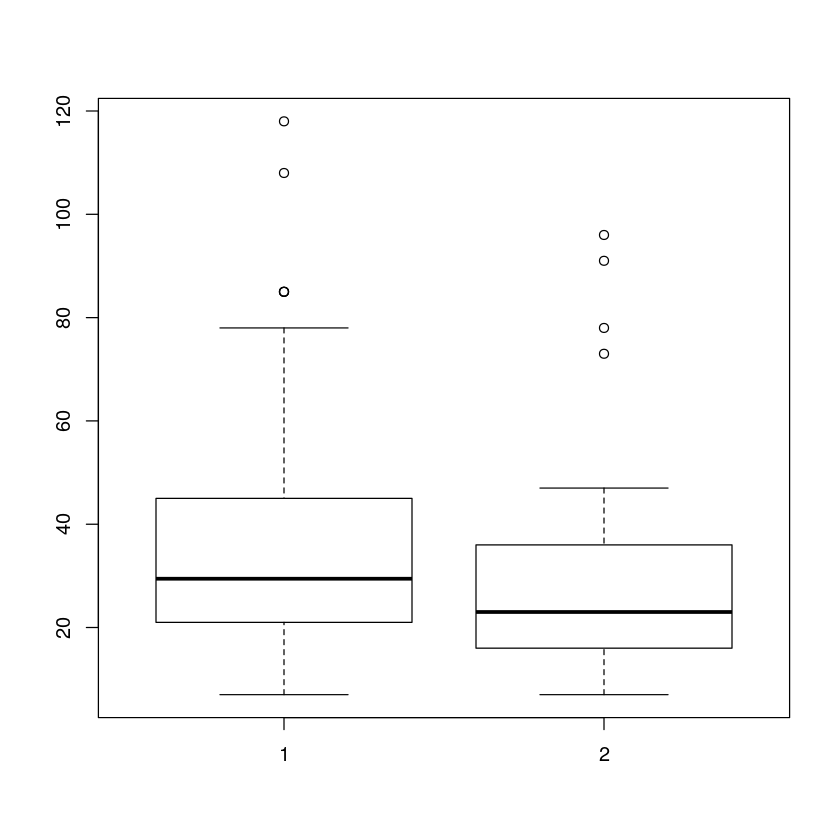

In [41]:
boxplot(res,y)

#### Is it true that T, S, W determine ozone levels?

In [11]:
M=matrix(data=NA, nrow=2,ncol=3)
for (i in 2:3){
  M[i-1,1]=quantile(airquality[,i], 0.33,na.rm=TRUE)
  M[i-1,2]=quantile(airquality[,i], 0.66,na.rm=TRUE)
}
M[,3]=rep(10000,2)
M

144.1,240.8,10000
8.0,11.5,10000


In [12]:
res = matrix(data = NA, nrow = 9, ncol = 5)
matr = airquality[, 2:5]
n = 1
for (i in 1:3) {
    for (j in 1:3) {
        for (mon in 5:9) {
            ind = which(matr[, 1] < M[1, i] & matr[, 2] < M[2, j] & matr[, 4] == 
                mon)
            res[n, mon - 4] = mean(airquality$Ozone[ind], na.rm = TRUE)
            matr[ind, 4] = 0
        }
        n = n + 1
    }
}

res
friedman.test(res)

NaN,NaN,16.000,34.25000,47.00000
13.00000,20.66667,20.000,22.00000,17.66667
17.66667,12.00000,29.500,9.00000,19.66667
78.00000,NaN,77.500,113.75000,63.14286
NaN,23.00000,70.000,71.71429,21.00000
12.00000,21.00000,45.000,44.00000,21.80000
37.00000,NaN,78.625,122.00000,NaN
16.00000,NaN,52.600,31.00000,22.00000
25.33333,49.00000,10.000,24.50000,21.00000



	Friedman rank sum test

data:  res
Friedman chi-squared = 1.6, df = 4, p-value = 0.8088
